In [104]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [105]:
df =pd.read_csv("C:\\Users\\jaiad\\OneDrive\\Desktop\\Data Analysis\\Feature Engineering\\winequality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [107]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [108]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494     True
6495    False
6496    False
Length: 6497, dtype: bool


C:\Users\jaiad\AppData\Local\Temp\ipykernel_21820\107078400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['residual sugar'])
C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual sugar', ylabel='Density'>

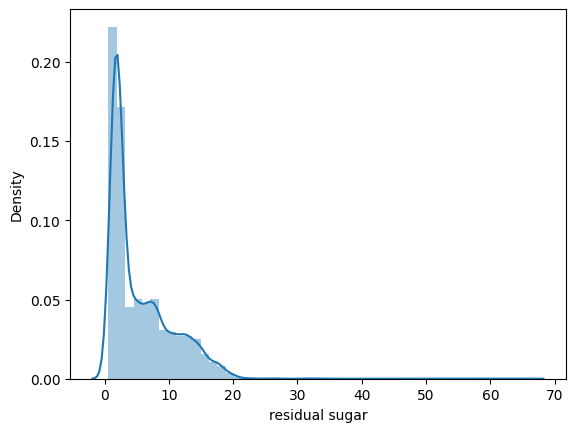

In [109]:
sns.distplot(df['residual sugar'])

<Axes: >

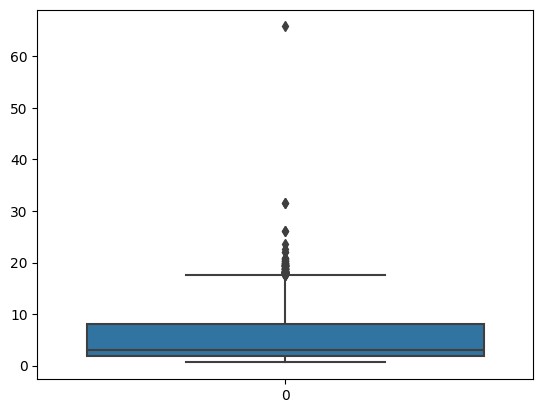

In [110]:
#To see outliers clearly we use boxplot
sns.boxplot(df['residual sugar'])

Z-SCORE Method:

In [129]:
#find the limits
upperlimit=df['residual sugar'].mean() + 3*df['residual sugar'].std()
lowerlimit=df['residual sugar'].mean() - 3*df['residual sugar'].std()
print('upperlimit:',upperlimit)
print('lowerlimit:',lowerlimit)


upperlimit: 19.718700632944987
lowerlimit: -8.830047823091254


In [131]:
#Find the outliers
df.loc[(df['residual sugar']>upperlimit) | (df['residual sugar']<lowerlimit)]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
182,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
191,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
292,white,7.4,0.280,0.42,19.80,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5
444,white,6.9,0.240,0.36,20.80,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
1454,white,8.3,0.210,0.49,19.80,0.054,50.0,231.0,1.00120,2.99,0.54,9.2,5
1608,white,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6


In [147]:
#Trimming:delete the outlier data
new_df = df.loc[(df['residual sugar'] < upperlimit) & (df['residual sugar'] > lowerlimit)]


In [149]:
print('old data:', len(df))
print('new data:', len(new_df))
print('outlier size:', len(df) - len(new_df))


old data: 6497
new data: 6469
outlier size: 28


In [151]:
new_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


C:\Users\jaiad\AppData\Local\Temp\ipykernel_21820\3242240098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['residual sugar'])
C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual sugar', ylabel='Density'>

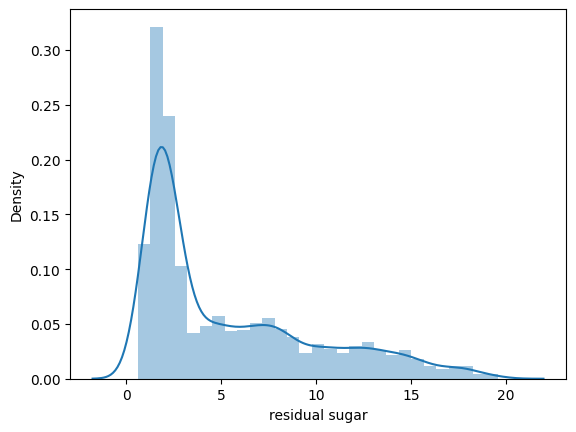

In [157]:
sns.distplot(new_df['residual sugar'])

In [165]:
#Capping:change the outliervalues to upper (or) lower limt values
new_df=df.copy()
new_df.loc[new_df['residual sugar']>upperlimit, 'residual sugar']=upperlimit
new_df.loc[new_df['residual sugar']<lowerlimit, 'residual sugar']=lowerlimit

<Axes: >

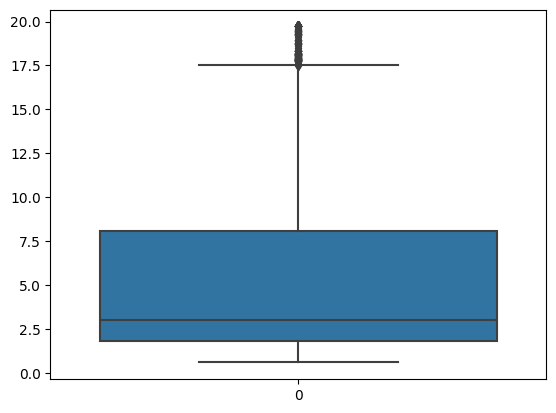

In [167]:
sns.boxplot(new_df['residual sugar'])

In [171]:
len(new_df)

6497

IQR (Inter Quartile Range) Method

In [181]:
q1=df['residual sugar'].quantile(0.25)
q3=df['residual sugar'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr



(1.8, 8.1, 6.3)

In [193]:
lower_limit= q1 - (1.5*iqr)
upper_limit= q3 + (1.5*iqr)
lower_limit,upper_limit

(-7.6499999999999995, 17.549999999999997)

<Axes: >

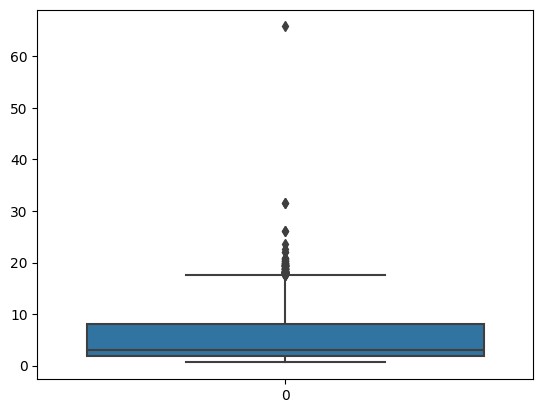

In [195]:
sns.boxplot(df['residual sugar'])

In [211]:
#Trimming
new_df = df.loc[(df['residual sugar'] < upper_limit) & (df['residual sugar'] > lower_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outlier size:', len(df) - len(new_df))


old data: 6497
new data: 6377
outlier size: 120


C:\Users\jaiad\AppData\Local\Temp\ipykernel_21820\3242240098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['residual sugar'])
C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual sugar', ylabel='Density'>

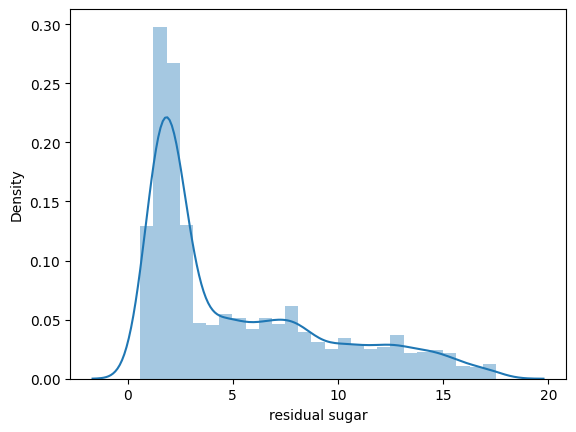

In [215]:
sns.distplot(new_df['residual sugar'])

In [217]:
#Capping
new_df=df.copy()
new_df.loc[new_df['residual sugar']>upper_limit, 'residual sugar']=upper_limit
new_df.loc[new_df['residual sugar']<lower_limit, 'residual sugar']=lower_limit

<Axes: >

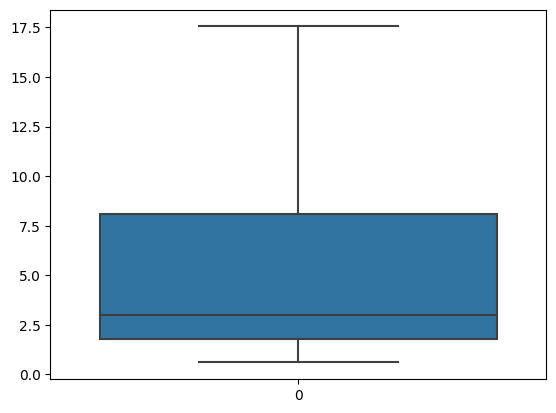

In [219]:
sns.boxplot(new_df['residual sugar'])

Percentile Method:

In [235]:
upper_limit=(df['residual sugar'].quantile(0.99))
lower_limit=(df['residual sugar'].quantile(0.01))
print('upper_limit:',upper_limit)
print('lower_limit:',lower_limit)

upper_limit: 18.2
lower_limit: 0.9


<Axes: >

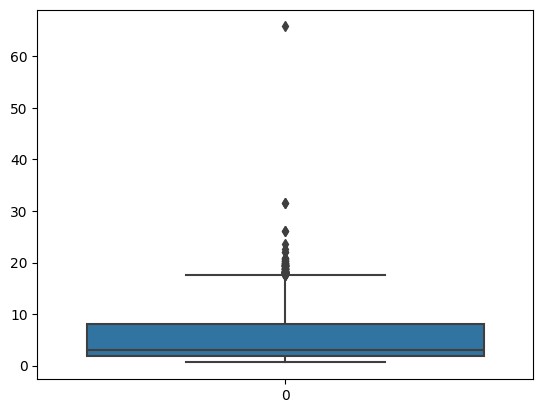

In [237]:
sns.boxplot(df['residual sugar'])

In [241]:
new_df = df.loc[(df['residual sugar'] > upper_limit) | (df['residual sugar'] < lower_limit)]
new_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6
14,white,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
103,white,7.5,0.305,0.40,18.90,0.059,44.0,170.0,1.00000,2.99,0.46,9.00,5
111,white,7.2,0.270,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.90,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,white,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6
4778,white,5.8,0.315,0.19,19.40,0.031,28.0,106.0,0.99704,2.97,0.40,10.55,6
4779,white,6.0,0.590,0.00,0.80,0.037,30.0,95.0,0.99032,3.10,0.40,10.90,4
4877,white,5.9,0.540,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.80,5


In [251]:
new_df = df.loc[(df['residual sugar'] <= upper_limit) & (df['residual sugar'] >= lower_limit)]
print('old data:', len(df))
print('new data:', len(new_df))
print('outlier size:', len(df) - len(new_df))


old data: 6497
new data: 6398
outlier size: 99


C:\Users\jaiad\AppData\Local\Temp\ipykernel_21820\3242240098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['residual sugar'])
C:\Users\jaiad\anaconda3\anconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual sugar', ylabel='Density'>

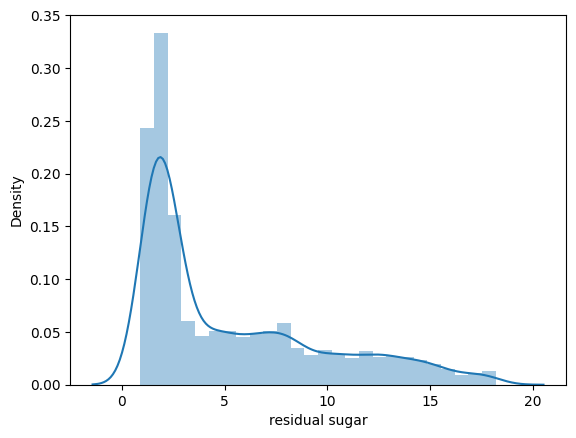

In [257]:
sns.distplot(new_df['residual sugar'])